## **Desafio Final**
**Enunciado**    
Neste desafio final vamos empregar boa parte dos conceitos mostrados no decorrer de todos os módulos do bootcamp para a análise e classificação de veículos, do conhecido dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e cilindradas cúbicas.    
    

**Objetivos**     
Trabalhar os temas abordados nos módulos.
- Pré-processamento dos dados. 
- Detecção de anomalias. 
- Processamento dos dados. 
- Correlações. 
- Redução da dimensionalidade. 
- Algoritmos supervisionados e não supervisionados. 


### Análise dos Dados 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importa os dados para o colab
from google.colab import files
uploaded = files.upload()

In [3]:
# visualizando o df
cars = pd.read_csv('cars.csv')
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
# renomeando a coluna
cars.rename(columns={'time-to-60': 'time_to_60'}, inplace = True)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time_to_60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


**Tratando valores missing**

In [6]:
# verificando dados nulos
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time_to_60     0
year           0
brand          0
dtype: int64

Aparentemente, não há valores nulos. Mas uma olhada mais atenta nos mostra células com espaços em branco que o Pandas não identificou como NaN:

In [7]:
# células com um espaço em branco
cars[cars['weightlbs'].str.contains(' ')]

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
14,19.1,6,225,90,,19,1981,US.
33,21.0,6,199,90,,15,1971,US.
172,29.0,4,68,49,,20,1974,Europe.


In [8]:
cars[cars['cubicinches'].str.contains(' ')]

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [9]:
# transformando as features em dados numéricos, com exceção da coluna 'brand'
cars.iloc[:, :-1] = cars.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time_to_60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


Agora temos os dados numéricos, com indicação dos valores NaN em '*cubicinches*' e '*weightlbs*'.

In [11]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time_to_60     0
year           0
brand          0
dtype: int64

*Para a resolução do desafio, a orientação é preencher os valores missing com as médias: 

In [12]:
cars['cubicinches'].fillna(cars.cubicinches.mean(), inplace=True)
cars['weightlbs'].fillna(cars.weightlbs.mean(), inplace=True)

**Análise dos dados**

In [13]:
# estatísticas dos dados
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


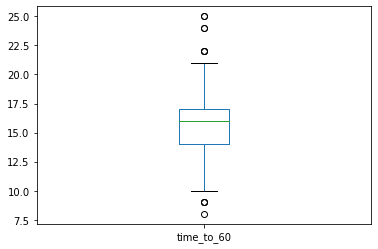

In [14]:
#verificando possíveis outliers com boxplot
cars['time_to_60'].plot.box()
plt.show()

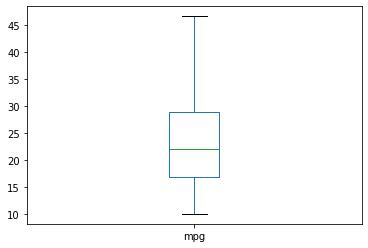

In [15]:
cars['mpg'].plot.box()
plt.show()

In [16]:
# Quais os mais velozes?
cars.query("time_to_60 <= 9").sort_values('time_to_60')

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
52,14.0,8,340.0,160,3609.0,8,1971,US.
7,14.0,8,440.0,215,4312.0,9,1971,US.
205,15.0,8,390.0,190,3850.0,9,1971,US.
244,14.0,8,454.0,220,4354.0,9,1971,US.


In [17]:
# Quais os mais lentos?
cars.query("time_to_60 >= 24").sort_values('time_to_60', ascending=False)

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
51,27.2,4,141.0,71,3190.0,25,1980,Europe.
235,44.0,4,97.0,52,2130.0,25,1983,Europe.
106,43.4,4,90.0,48,2335.0,24,1981,Europe.
164,23.0,4,97.0,54,2254.0,24,1973,Europe.


**Correlações**

In [18]:
# identificando correlações 
corr = cars.corr()
corr

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
mpg,1.000000,-0.776710,-0.802379,-0.774905,-0.823800,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951246,0.845155,0.894447,-0.578161,-0.322239
cubicinches,-0.802379,0.951246,1.000000,0.906413,0.925288,-0.610679,-0.349743
hp,-0.774905,0.845155,0.906413,1.000000,0.857125,-0.744873,-0.383869
weightlbs,-0.823800,0.894447,0.925288,0.857125,1.000000,-0.477240,-0.278683
time_to_60,0.509070,-0.578161,-0.610679,-0.744873,-0.477240,1.000000,0.312311
year,0.550441,-0.322239,-0.349743,-0.383869,-0.278683,0.312311,1.000000


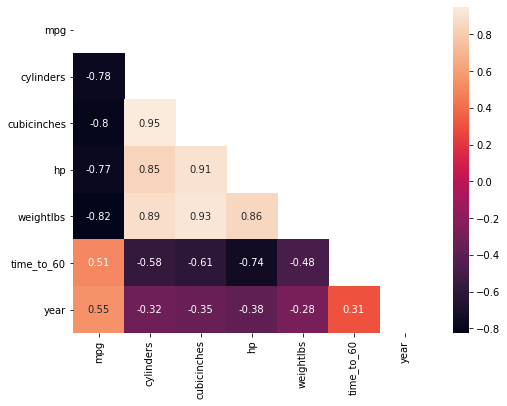

In [19]:
# visualizando as correlações 
f, ax = plt.subplots(figsize=(8, 6))

# mask for the upper triangle
mask = np.triu(np.ones_like(corr)) 

sns.heatmap(corr,  mask=mask, annot=True)

**Preprocessing**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# criando um novo df com os dados numéricos
cars_norm = cars.iloc[:, :-1]

# normalização dos dados
scaler = StandardScaler()
scaler.fit_transform(cars_norm)

print(scaler.scale_)

[  7.80856822   1.72998583 108.62856848  40.42229884 847.46939011
   2.9050434    3.63072056]


In [22]:
# redução de dimensionalidade 
pca = PCA(n_components=7)
pca.fit(cars_norm)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.singular_values_

array([1.37993219e+04, 6.93901191e+02, 2.62162688e+02, 7.81540874e+01,
       3.95896649e+01, 2.69999176e+01, 8.33699524e+00])

**Modelos de Machine Learning**

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

**Supervisionado**    
Vamos criar uma nova feature para a classificar a eficiência do veículo: Veículos que percorrem mais de 25 milhas por galão (“mpg”>25) devem ser considerados eficientes.


In [25]:
# incluindo uma nova feature (1: eficiente / 0: não-eficiente)
cars_clf = cars_norm.copy()
cars_clf['eficiencia'] = cars_clf['mpg'].apply(lambda x: 1 if x>25 else 0)
cars_clf.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,eficiencia
0,14.0,8,350.0,165,4209.0,12,1972,0
1,31.9,4,89.0,71,1925.0,14,1980,1
2,17.0,8,302.0,140,3449.0,11,1971,0
3,15.0,8,400.0,150,3761.0,10,1971,0
4,30.5,4,98.0,63,2051.0,17,1978,1


In [26]:
# definindo os dados de entrada e saída
X = cars_clf[['cylinders', 'cubicinches', 'hp' , 'weightlbs', 'time_to_60']] 
y = cars_clf['eficiencia']

In [27]:
# dividindo os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
# construindo o modelo
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



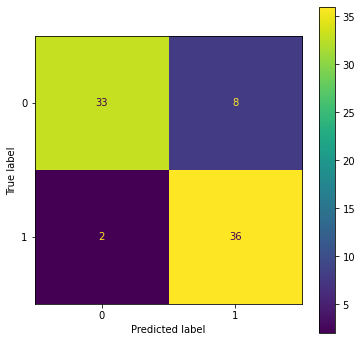

In [30]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(6, 6)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

**Não-supervisionado**    
Vamos utilizar os três primeiros componentes principais para construir o K-means com um número de 3 clusters:


In [31]:
# definindo os dados de entrada
X = cars_norm[['mpg',	'cylinders',	'cubicinches']]

In [32]:
# construindo o modelo não-supervisionado (KMeans)
kmeans = KMeans(n_clusters=3,random_state=42)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Agrupamento por cluster')

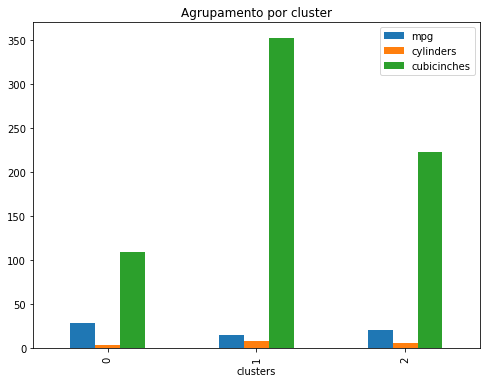

In [33]:
X["clusters"] = y_kmeans
X.groupby("clusters").aggregate("mean").plot.bar(figsize=(8,6))
plt.title("Agrupamento por cluster")

In [34]:
# elementos por cluster 
X['clusters'].value_counts()

0    133
1     73
2     55
Name: clusters, dtype: int64

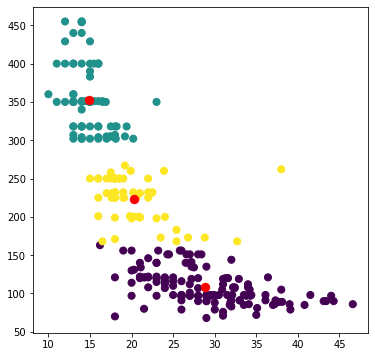

In [35]:
# visualizando os clusters e os centróides
plt.scatter(X['mpg'], X['cubicinches'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='red', s=70)
plt.show()

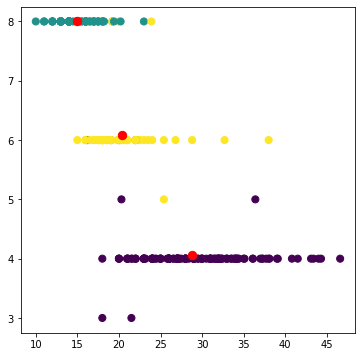

In [36]:
# visualizando os clusters e os centróides
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=70)

plt.show()